# Project Title: Food Delivery Data Analysis

# Goal:
The primary objective of this project is to analyze food delivery data to understand customer behavior, delivery trends, and operational efficiency.

# Approach:
1. Data Loading & Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Insights & Visualization
5. Modeling

# Dataset
The food delivery dataset CSV file from Google Drive into a DataFrame named df.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('food_delivery.csv')
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


Displays the number of rows and columns in the dataset.

In [4]:
df.shape

(500, 7)

Provides descriptive statistics (mean, std, min, max, etc.) for numerical columns.

In [5]:
df.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


Cheaking null values for each row in dataset.

In [6]:
df.isna().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

Find uniqe value in FavoriteCuisine column.

After in feature engineering, we will have a Label Encoding for the column FavoriteCuisine. This will be done by using the sklearn preprocessing.

In [7]:
df['FavoriteCuisine'].unique()

array(['Mexican', 'Thai', 'Italian', 'Chinese', 'Indian'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])

In [9]:
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,3,4.6,20.9
1,2,46,34,193.97,3,3.0,150.2
2,3,32,22,291.66,3,4.1,59.7
3,4,25,30,232.21,4,3.7,85.5
4,5,38,27,244.84,2,4.7,13.7


Find Correlation for Dataset df.

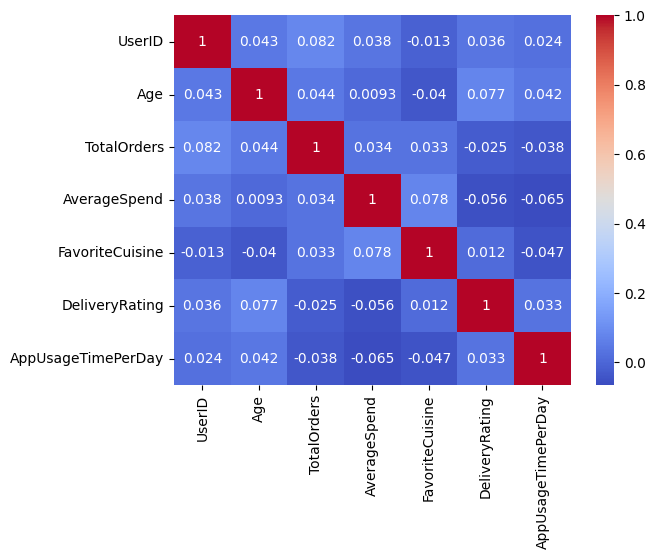

In [10]:
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In our dataset UserID is not require in the sence we drop so not effect in our target variable or output so it is drop. 

In [11]:
x = df.drop('UserID',axis=1)
x

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


We have use another feature of feature enginearing called StandardScaler . This feature is used to scale the data. It is used to scale the data to a common range. This is useful when we are using a model that is sensitive to the scale of the data.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# PCA
We use PCA to reduce the dimensionality of the data and convert to two principle is Principal component 1 and Principal component 2. We use the first two principal components to represent the data.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

Also Use Model like :-
# KMean , DBSCAN , AgglomerativeClustering

In [14]:
from sklearn.cluster import KMeans , DBSCAN,AgglomerativeClustering
KMeans = KMeans(n_clusters=3)
KMeans_labels = KMeans.fit_predict(x_scaled)

In [15]:
centroid_pca = pca.transform(KMeans.cluster_centers_)

Here is a scatter plot for PCA between PC1 and PC2.we show a group of points that are close to each other, which means that they have similar characteristics. show a cluster in three group. 

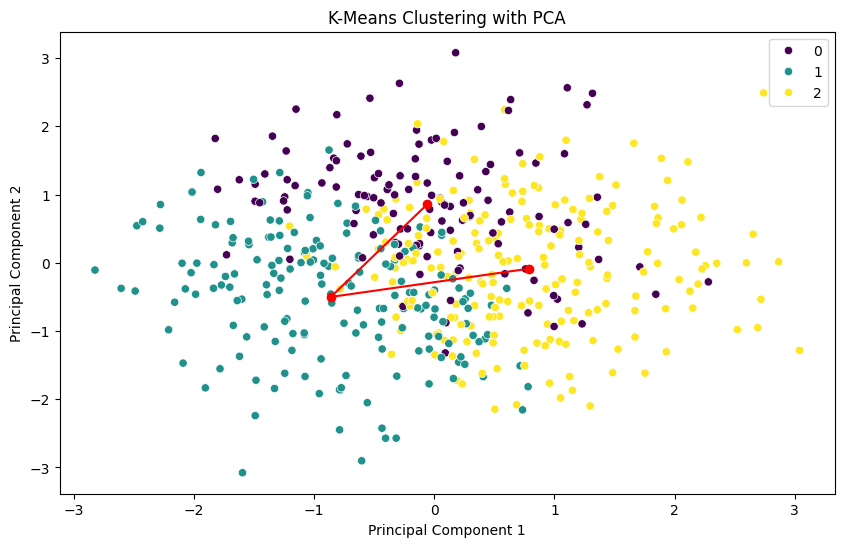

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=KMeans_labels, palette='viridis')
plt.plot(centroid_pca[:, 0], centroid_pca[:, 1],color = 'red',marker = 'o')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a DBSCAN model and taking a result and make a scatter plot beetween PC1 and PC2.

In [17]:
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(x_scaled)

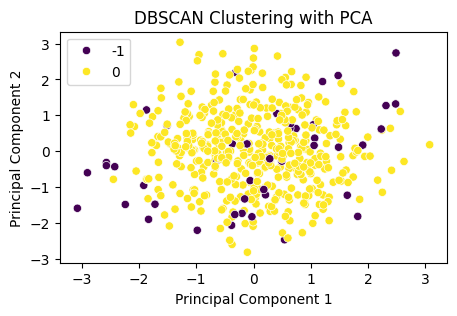

In [18]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 0], hue=db_labels, palette='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a AgglomerativeClustering model and taking a result and make a scatter plot beetween PC1 and PC2.

In [19]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(x_scaled)

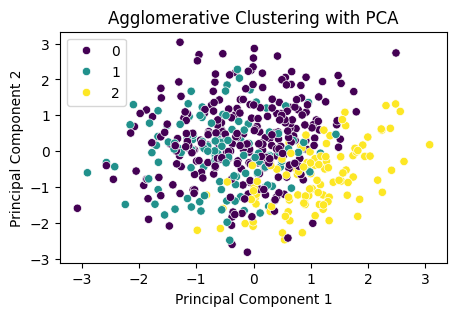

In [20]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 0], hue=agglo_labels, palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use another model like :-
# Dendrogram , linkage , GaussianMixture , OPTICS

Use a dendrogram,linkage model and taking a result and make a scatter plot beetween PC1 and PC2.

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

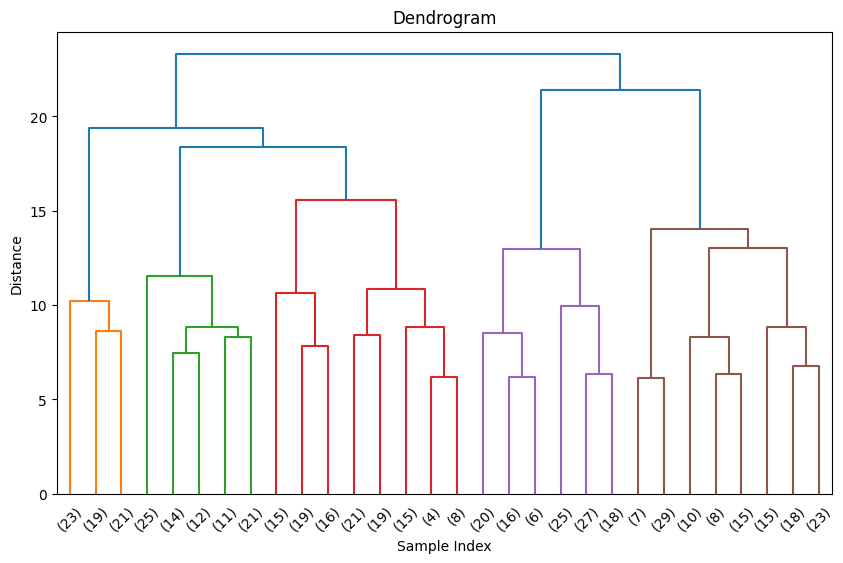

In [22]:
plt.figure(figsize=(10, 6))
link = linkage(x_scaled, method='ward')
dendrogram(link ,p = 30,truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Use a GaussianMixture model and taking a result and make a scatter plot beetween PC1 and PC2.

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x)
gmm_labels = gmm.predict(x)

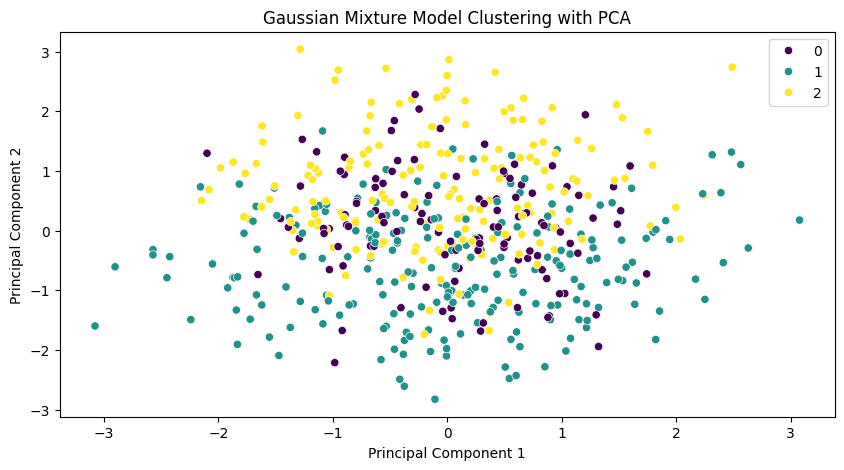

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 0], hue=gmm_labels, palette='viridis')
plt.title('Gaussian Mixture Model Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Use a OPTICS model and taking a result and make a scatter plot beetween PC1 and PC2.

In [26]:
from sklearn.cluster import OPTICS

In [27]:
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(x)
optics_labels = clustering.labels_

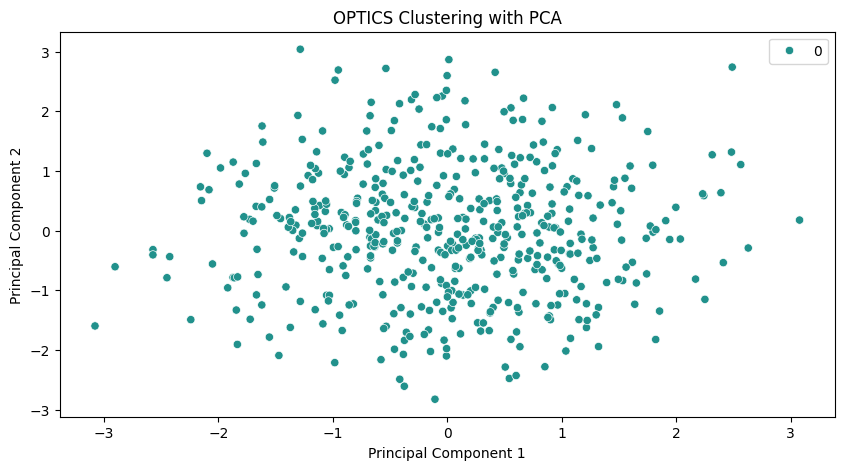

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 0], hue=optics_labels, palette='viridis', legend='full')
plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Conclution
Customer Choices: We found out which types of food are most liked by customers.

Delivery Process: We looked at how distance, traffic, and other things affect delivery time.

Busy Times: We found out which hours and days have the most food orders.